In [2]:
import pandas as pd
import os

def read_csv_files(directory, file_extension):
    dfs = []

    for filename in os.listdir(directory):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

directory = 'data/'
combined_df = read_csv_files(directory, '2009.csv')


In [3]:
def display_dataframe_info(df):
    pd.set_option('display.max_columns', None)
    print("Basic information about the DataFrame:")
    print(df.info())

    print("\nSummary statistics of the DataFrame:")
    print(df.describe())

    print("\nFirst few rows of the DataFrame:")
    print(df.head())

In [4]:
def clean_data(df):
    df = df.drop_duplicates()
    df.drop('Unnamed: 27', axis=1, inplace=True)

    specific_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
    df[specific_columns] = df[specific_columns].fillna(0.0)

    numerical_columns = df.select_dtypes(include=['number']).columns
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)

    df = df.dropna()

    return df

In [5]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def convert_to_numeric(df):
    date_cols = df.select_dtypes(include=['datetime64']).columns
    reference_date = datetime(1970, 1, 1)
    for col in date_cols:
        df[col] = (df[col] - reference_date).dt.days

    label_encoder = LabelEncoder()
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        df[col] = label_encoder.fit_transform(df[col])
        
    df = df.drop(columns=string_cols)

    return df

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import matplotlib.pyplot as plt

def select_top_correlated_features(df, target_column, num_features=5):
    numeric_df = df.select_dtypes(include=['number'])

    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[target_column].abs().sort_values(ascending=False)
    
    top_correlated_features = corr_with_target.drop(target_column)[:num_features]
    
    selected_feature_names = top_correlated_features.index.tolist()
    selected_feature_names.append(target_column)
    selected_df = df[selected_feature_names]

    selected_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    return selected_df

In [7]:
from sklearn.preprocessing import StandardScaler

def scale_data(df):
    numeric_df = df.select_dtypes(include=['number'])
    scaler = StandardScaler()

    scaled_data = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns, index=df.index)

    for column in df.columns:
        if column not in numeric_df.columns:
            scaled_df[column] = df[column]

    return scaled_df

C:\Users\Endżi\AppData\Local\Temp\ipykernel_17112\1123687757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 27', axis=1, inplace=True)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_17112\1123687757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[specific_columns] = df[specific_columns].fillna(0.0)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_17112\1123687757.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This

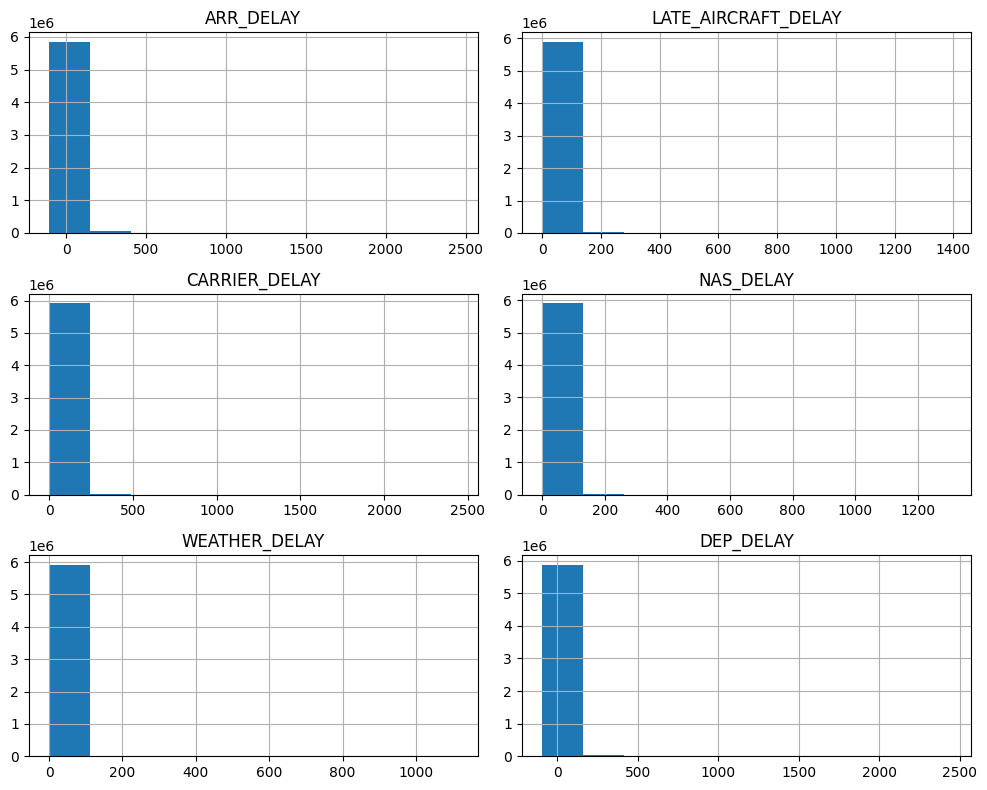

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5918486 entries, 0 to 6429337
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ARR_DELAY            float64
 1   LATE_AIRCRAFT_DELAY  float64
 2   CARRIER_DELAY        float64
 3   NAS_DELAY            float64
 4   WEATHER_DELAY        float64
 5   DEP_DELAY            float64
dtypes: float64(6)
memory usage: 316.1 MB
None

Summary statistics of the DataFrame:
          ARR_DELAY  LATE_AIRCRAFT_DELAY  CARRIER_DELAY     NAS_DELAY  \
count  5.918486e+06         5.918486e+06   5.918486e+06  5.918486e+06   
mean   8.244404e-17         4.331578e-17   8.403837e-18 -7.491420e-18   
std    1.000000e+00         1.000000e+00   1.000000e+00  1.000000e+00   
min   -3.201212e+00        -2.065561e-01  -1.574318e-01 -2.135695e-01   
25%   -4.774696e-01        -2.065561e-01  -1.574318e-01 -2.135695e-01   
50%   -2.481018e-01        -2.065561e-01  -1.574318e-01 -2.

In [8]:
def prepare_data(df):
    #display_dataframe_info(df)

    cleaned_df = clean_data(df)
    #display_dataframe_info(cleaned_df)

    converted_df = convert_to_numeric(cleaned_df)
    #display_dataframe_info(cleaned_df)

    selected_features_df = select_top_correlated_features(converted_df, 'DEP_DELAY', 5)

    scaled_df = scale_data(selected_features_df)
    display_dataframe_info(scaled_df)

prepare_data(combined_df)

In [23]:
def display_piechart(counts, title):
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  
    plt.show()

In [10]:
combined_df.drop('Unnamed: 27', axis = 1, inplace=True)
combined_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN


In [11]:
def get_delay_type(row):
    if row['CARRIER_DELAY'] == 1:
        return 'CARRIER'
    elif row['WEATHER_DELAY'] == 1:
        return 'WEATHER'
    elif row['NAS_DELAY'] == 1:
        return 'NAS'
    elif row["SECURITY_DELAY"] == 1:
        return 'SECURITY'
    elif row['LATE_AIRCRAFT_DELAY'] ==1:
        return 'LATE_AIRCRAFT'
    else:
        return None

combined_df['DELAY_TYPE'] = combined_df.apply(get_delay_type, axis = 1)
combined_df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis = 1, inplace = True)
combined_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,None
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,None
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,None
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,None
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,None


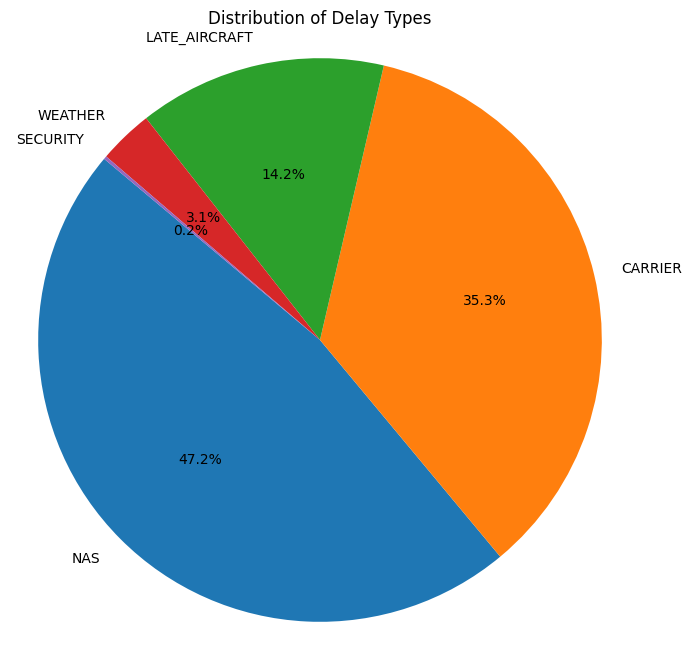

In [12]:
import matplotlib.pyplot as plt

delay_counts = combined_df['DELAY_TYPE'].value_counts()

display_piechart(delay_counts,'Distribution of Delay Types')


In [13]:
combined_df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

C:\Users\Endżi\AppData\Local\Temp\ipykernel_17112\1017012935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['OP_CARRIER'].replace({


In [14]:
canceled_df = combined_df[(combined_df['CANCELLED'] != 0)]
canceled_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE
879,2009-01-01,Mesa Airline,7104,DEN,CPR,2150,NaN,NaN,NaN,NaN,NaN,NaN,2312,NaN,NaN,1.0,A,0.0,82.0,NaN,NaN,230.0,None
926,2009-01-01,Mesa Airline,7329,DTW,ORD,1857,NaN,NaN,NaN,NaN,NaN,NaN,1914,NaN,NaN,1.0,A,0.0,77.0,NaN,NaN,235.0,None
935,2009-01-01,Mesa Airline,7065,EWR,IAD,1013,NaN,NaN,NaN,NaN,NaN,NaN,1139,NaN,NaN,1.0,A,0.0,86.0,NaN,NaN,213.0,None
938,2009-01-01,Mesa Airline,2984,FAT,LAS,710,NaN,NaN,NaN,NaN,NaN,NaN,820,NaN,NaN,1.0,B,0.0,70.0,NaN,NaN,258.0,None
941,2009-01-01,Mesa Airline,2823,FAT,PHX,920,NaN,NaN,NaN,NaN,NaN,NaN,1205,NaN,NaN,1.0,B,0.0,105.0,NaN,NaN,493.0,None


In [15]:
delayed_df = combined_df[(combined_df['DELAY_TYPE'].notna())]
delayed_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE
213,2009-01-01,XE,2304,IAH,GPT,1220,1234.0,14.0,17.0,1251.0,1344.0,6.0,1335,1350.0,15.0,0.0,NaN,0.0,75.0,76.0,53.0,376.0,NAS
553,2009-01-01,XE,2806,EWR,MCI,1450,1505.0,15.0,40.0,1545.0,1726.0,4.0,1714,1730.0,16.0,0.0,NaN,0.0,204.0,205.0,161.0,1092.0,NAS
1479,2009-01-01,NW,1765,PHL,DTW,921,1010.0,49.0,31.0,1041.0,1200.0,9.0,1119,1209.0,50.0,0.0,NaN,0.0,118.0,119.0,79.0,453.0,NAS
1562,2009-01-01,PSA Airlines,6448,CVG,DTW,835,908.0,33.0,16.0,924.0,1010.0,13.0,949,1023.0,34.0,0.0,NaN,0.0,74.0,75.0,46.0,229.0,NAS
1612,2009-01-01,PSA Airlines,6515,JFK,ORD,900,955.0,55.0,32.0,1027.0,1138.0,12.0,1054,1150.0,56.0,0.0,NaN,0.0,174.0,175.0,131.0,740.0,NAS


In [16]:
canceled_df['CANCELLATION_CODE'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

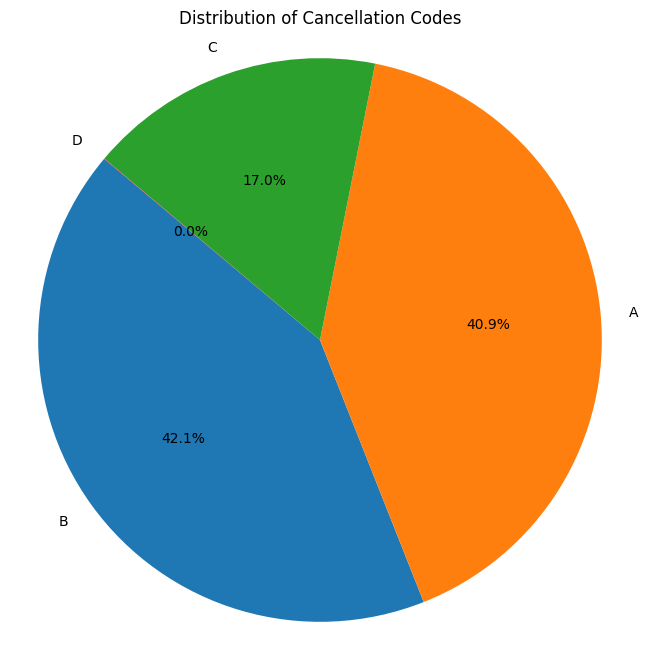

In [17]:
cancellation_codes = canceled_df['CANCELLATION_CODE'].value_counts()

display_piechart(cancellation_codes, 'Distribution of Cancellation Codes')


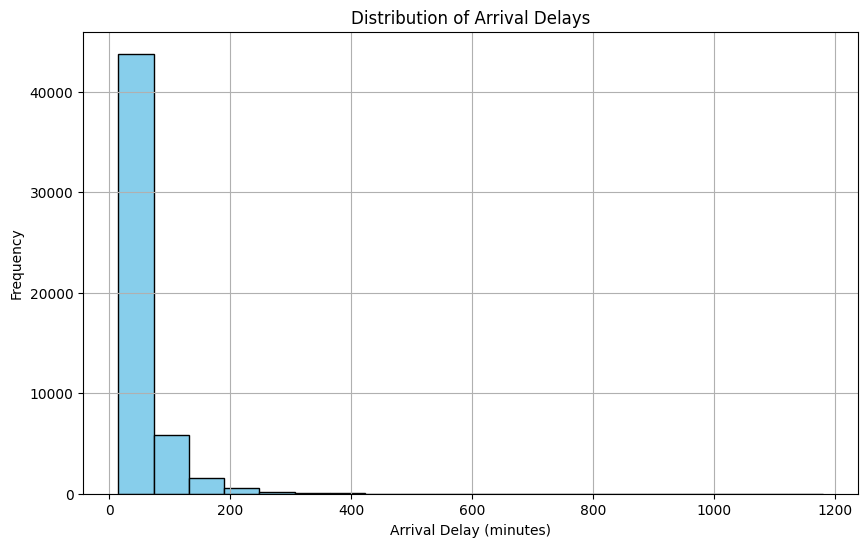

In [18]:

plt.figure(figsize=(10, 6))
plt.hist(delayed_df['ARR_DELAY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

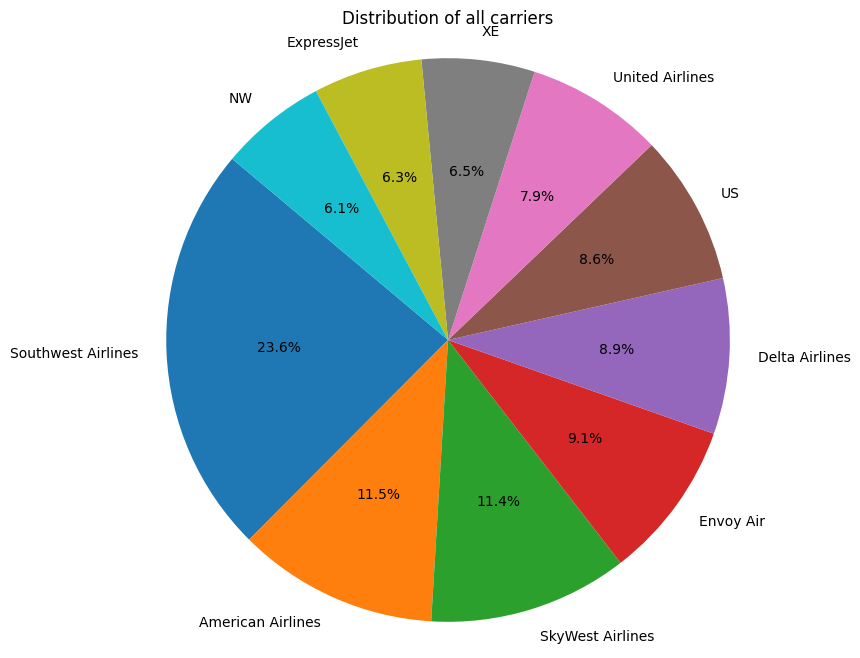

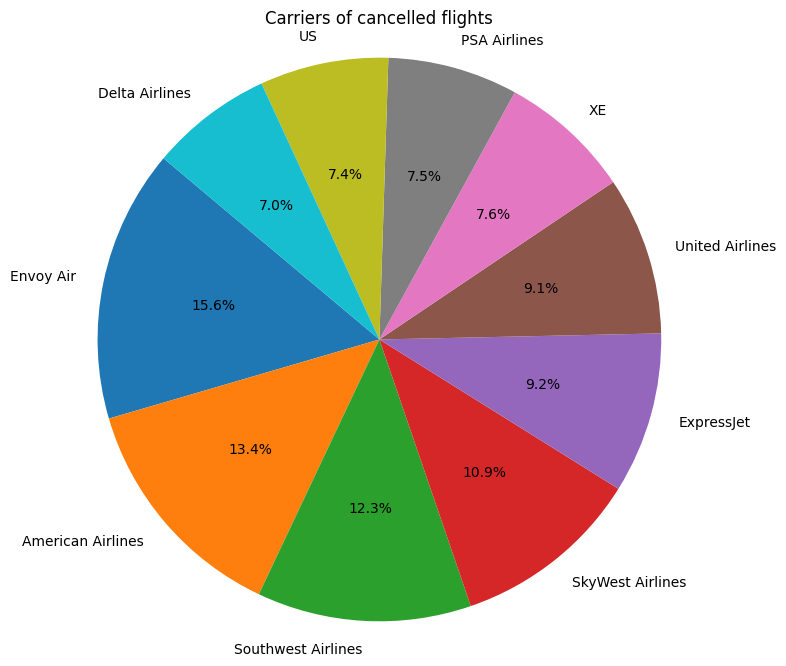

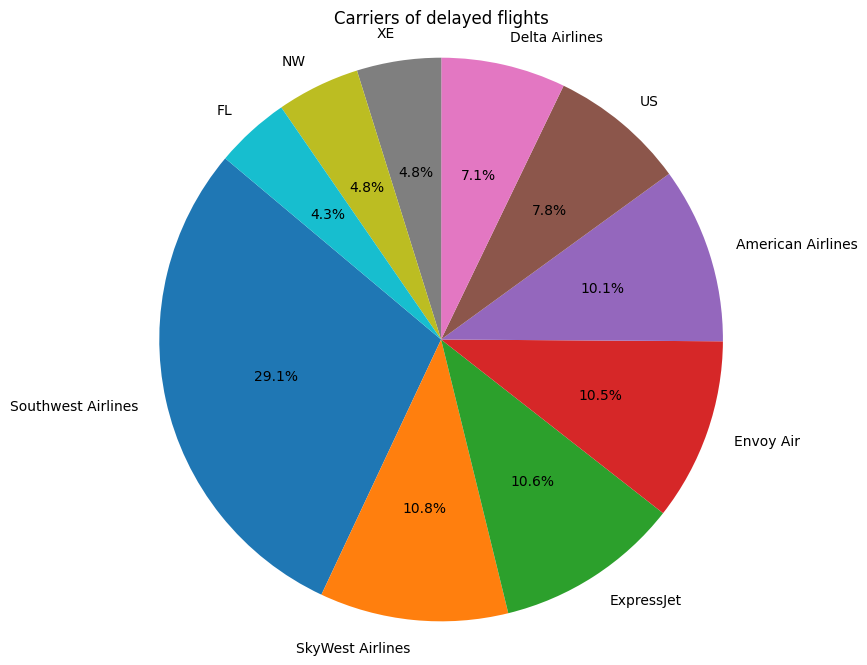

In [30]:
carriers_all = combined_df['OP_CARRIER'].value_counts()
carriers_canceled = canceled_df['OP_CARRIER'].value_counts()
carriers_delayed = delayed_df['OP_CARRIER'].value_counts()


plt.rcParams.update({'font.size': 10})
display_piechart(carriers_all[:10], 'Distribution of all carriers')

display_piechart(carriers_canceled[:10], 'Carriers of cancelled flights')

display_piechart(carriers_delayed[:10], 'Carriers of delayed flights')

In [33]:
combined_df['FL_DATE_month'] = pd.to_datetime(combined_df['FL_DATE']).dt.month


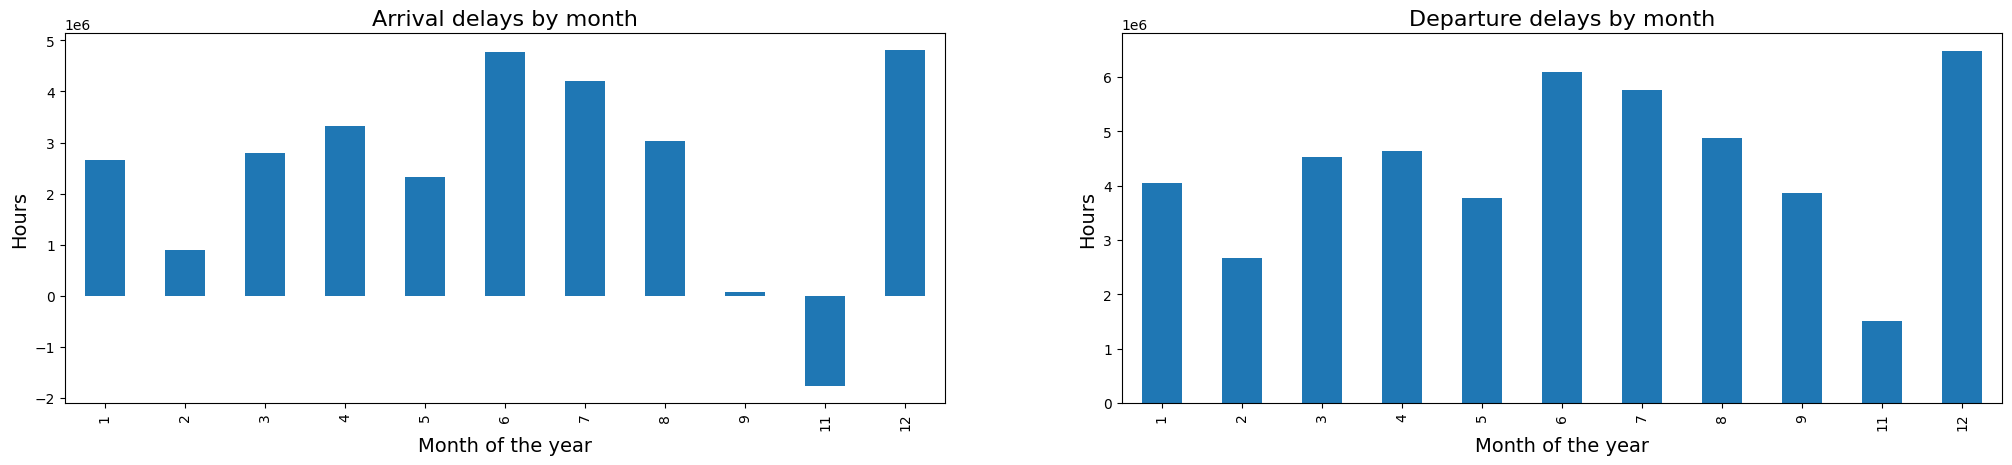

In [35]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
combined_df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('Arrival delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
combined_df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('Departure delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

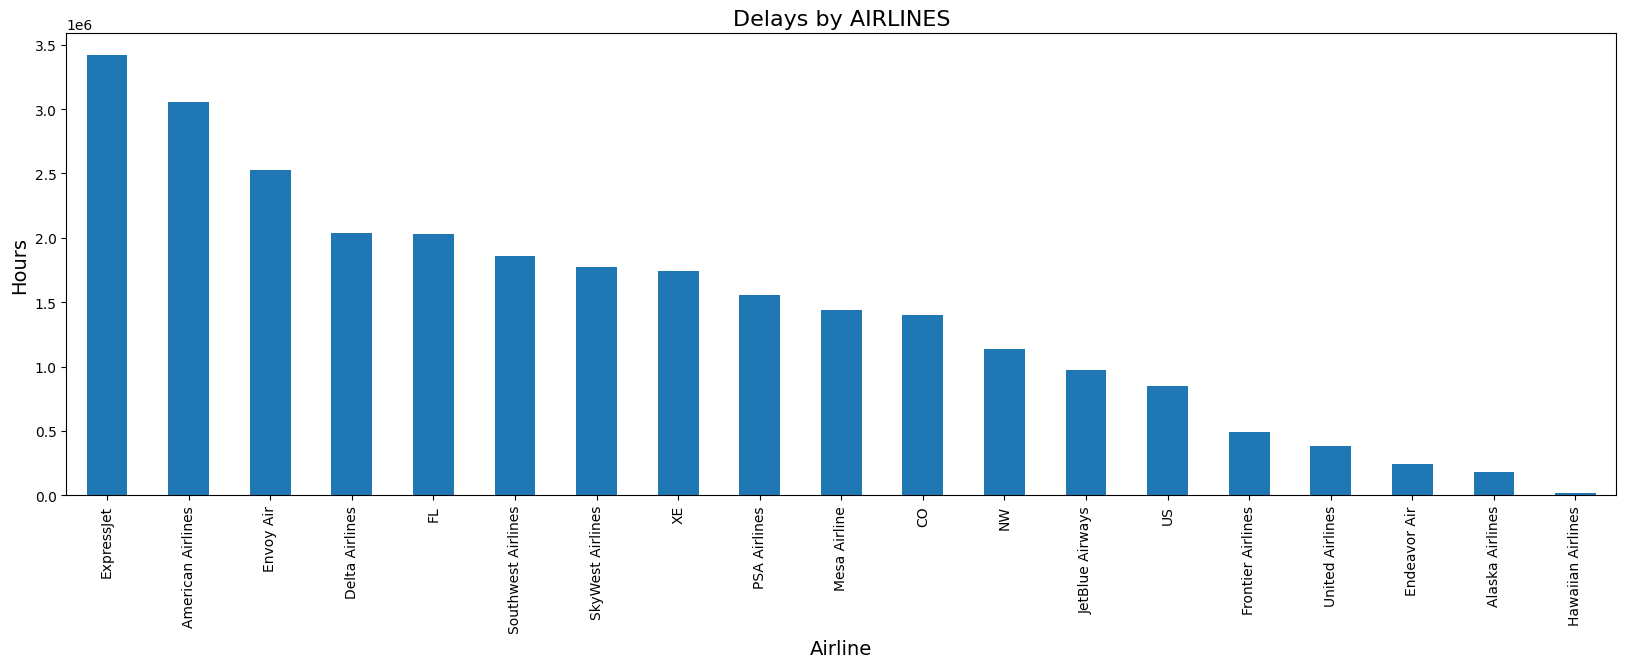

In [36]:
plt.figure(figsize=(20, 6))
combined_df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

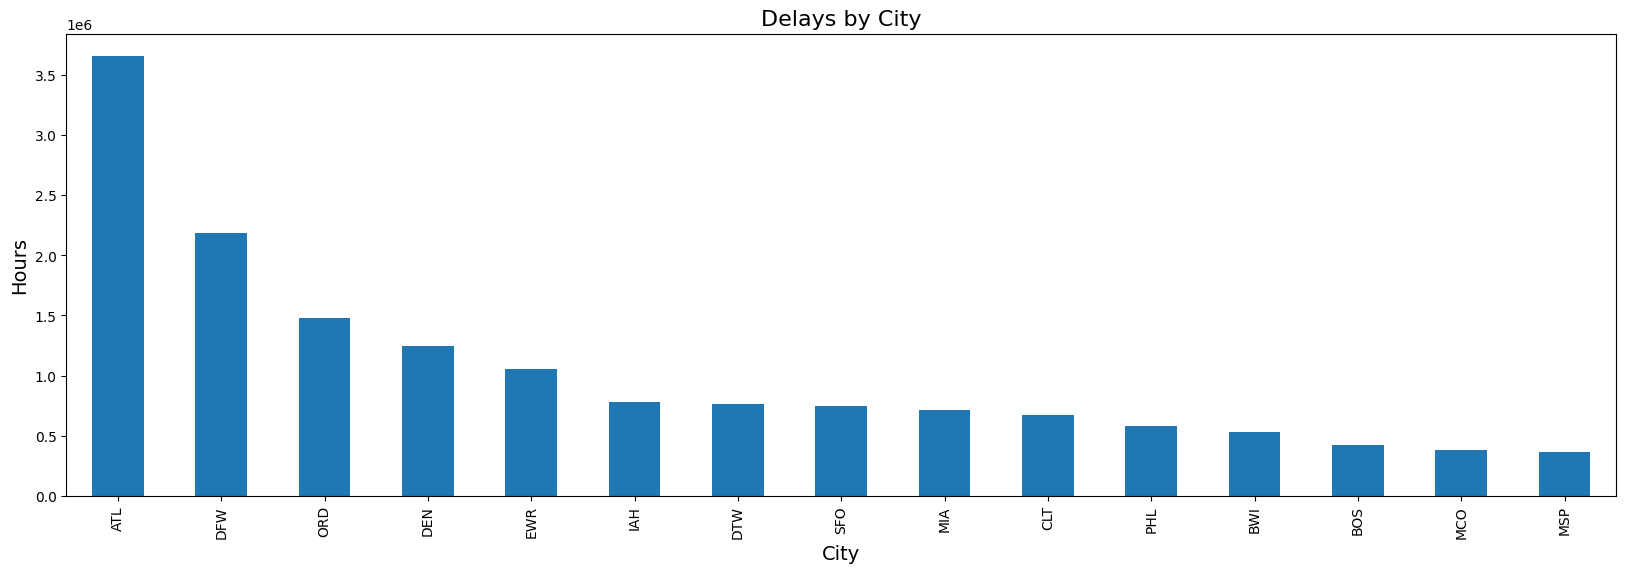

In [37]:
city_by_delay = combined_df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()